# EDA-Project 1

Это ваш первый проект из второго блока курса Data Science. 
Вам предоставляется следующий файл: ```"foreign_exchange_rates.csv"```.

Сделайте EDA по данным. 
Перечислите вопросы, которые вы считаете важными. Затем попробуйте ответить на каждый вопрос, с подде, визуализации. Пожалуйста, сделайте ваш код чистым, а аргументы понятными.


'''
1. Первым делом я бы хотел узнать, с чем имею дело. Поэтому, займусь чисткой данных (удалением ненужных столбцов, строк),
   приведу в удобный для обработки формат (числа в int/float), добавлю нужные для себя столбцы.
2. Можно ли сразу без визуализации заметить закономерности. То есть, однородно ли распределены данные по дням,
   месяцам, годам?
3. Есть ли закономерности распределения данных по годам, месяцам, дням?
4. Можно ли разделить все данные на классы по какому-то признаку, чтобы анализировать сходные между собой столбцы и,
   возможно, анализировать не все столбцы, а по экземпляру с класса.
5. Есть ли сходства и различия между классами?

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 1. Подготовка данных

In [2]:
data = pd.read_csv("foreign_exchange_rates.csv")
data.head()

,Unnamed: 0,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,...,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
0,0,2000-01-03,1.5172,0.9847,1.9033,0.6146,1.805,1.4465,8.2798,7.7765,...,1.6563,7.329,101.7,3.8,7.964,8.443,72.3,1.5808,31.38,36.97
1,1,2000-01-04,1.5239,0.97,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,...,1.6535,7.218,103.09,3.8,7.934,8.36,72.65,1.5565,30.6,37.13
2,2,2000-01-05,1.5267,0.9676,1.9339,0.6092,1.856,1.4518,8.2798,7.778,...,1.656,7.208,103.77,3.8,7.935,8.353,72.95,1.5526,30.8,37.1
3,3,2000-01-06,1.5291,0.9686,1.9436,0.607,1.84,1.4571,8.2797,7.7785,...,1.6655,7.2125,105.19,3.8,7.94,8.3675,72.95,1.554,31.75,37.62
4,4,2000-01-07,1.5272,0.9714,1.938,0.6104,1.831,1.4505,8.2794,7.7783,...,1.6625,7.2285,105.17,3.8,7.966,8.415,73.15,1.5623,30.85,37.3


In [3]:
data.tail()

,Unnamed: 0,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,...,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
5212,5212,2019-12-25,ND,ND,ND,ND,ND,ND,ND,ND,...,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND
5213,5213,2019-12-26,1.4411,0.9007,1.5002,0.7688,4.0602,1.3124,6.9949,7.788,...,1.354,6.7295,109.67,4.1337,8.8799,9.4108,181.3,0.9808,30.11,30.15
5214,5214,2019-12-27,1.4331,0.8949,1.4919,0.7639,4.0507,1.3073,6.9954,7.7874,...,1.352,6.6829,109.47,4.126,8.8291,9.3405,181.35,0.9741,30.09,30.14
5215,5215,2019-12-30,1.4278,0.8915,1.4846,0.761,4.0152,1.3058,6.9864,7.7857,...,1.3483,6.6589,108.85,4.1053,8.7839,9.3145,181.6,0.9677,30.04,29.94
5216,5216,2019-12-31,1.4225,0.8907,1.4826,0.7536,4.019,1.2962,6.9618,7.7894,...,1.3446,6.6554,108.67,4.0918,8.7823,9.3425,181.3,0.9677,29.91,29.75


In [4]:
rates=data.copy()

'''
Дабы оригинальные данные оставались неизменными, работать будем с копией - rates.

Столбец Unnamed: 0 сам по себе не представляет ценности, в то же время лишь повторяет значения индекса.
Я бы хотел избавиться от ненужного столбца.

In [5]:
rates.drop("Unnamed: 0", axis = 1, inplace = True)
rates.head()

,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,INDIA - INDIAN RUPEE/US$,...,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
0,2000-01-03,1.5172,0.9847,1.9033,0.6146,1.805,1.4465,8.2798,7.7765,43.55,...,1.6563,7.329,101.7,3.8,7.964,8.443,72.3,1.5808,31.38,36.97
1,2000-01-04,1.5239,0.97,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,43.55,...,1.6535,7.218,103.09,3.8,7.934,8.36,72.65,1.5565,30.6,37.13
2,2000-01-05,1.5267,0.9676,1.9339,0.6092,1.856,1.4518,8.2798,7.778,43.55,...,1.656,7.208,103.77,3.8,7.935,8.353,72.95,1.5526,30.8,37.1
3,2000-01-06,1.5291,0.9686,1.9436,0.607,1.84,1.4571,8.2797,7.7785,43.55,...,1.6655,7.2125,105.19,3.8,7.94,8.3675,72.95,1.554,31.75,37.62
4,2000-01-07,1.5272,0.9714,1.938,0.6104,1.831,1.4505,8.2794,7.7783,43.55,...,1.6625,7.2285,105.17,3.8,7.966,8.415,73.15,1.5623,30.85,37.3


In [6]:
rates.describe()

,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,INDIA - INDIAN RUPEE/US$,...,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
count,5217,5217,5217,5217,5217,5217,5217,5217,5217,5217,...,5217,5217,5217,5217,5217,5217,5217,5217,5217,5217
unique,5217,2959,2704,2681,2303,3880,3147,2711,893,1998,...,2927,4462,2848,1788,4511,4574,1781,3190,714,1380
top,2006-07-13,ND,ND,ND,ND,ND,ND,8.2765,ND,ND,...,ND,ND,ND,3.8,ND,ND,ND,ND,ND,ND
freq,1,198,198,198,198,198,198,208,198,199,...,198,198,198,1376,198,198,198,198,201,198


'''
Заметно, что есть строки, в которых нет данных "ND"
Они не представляют ценности, так как мешают обработке и анализу в дальнейшем.

In [7]:
rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5217 entries, 0 to 5216
Data columns (total 23 columns):
Time Serie                                   5217 non-null object
AUSTRALIA - AUSTRALIAN DOLLAR/US$            5217 non-null object
EURO AREA - EURO/US$                         5217 non-null object
NEW ZEALAND - NEW ZELAND DOLLAR/US$          5217 non-null object
UNITED KINGDOM - UNITED KINGDOM POUND/US$    5217 non-null object
BRAZIL - REAL/US$                            5217 non-null object
CANADA - CANADIAN DOLLAR/US$                 5217 non-null object
CHINA - YUAN/US$                             5217 non-null object
HONG KONG - HONG KONG DOLLAR/US$             5217 non-null object
INDIA - INDIAN RUPEE/US$                     5217 non-null object
KOREA - WON/US$                              5217 non-null object
MEXICO - MEXICAN PESO/US$                    5217 non-null object
SOUTH AFRICA - RAND/US$                      5217 non-null object
SINGAPORE - SINGAPORE DOLLAR/US$   

'''
Все строки так или иначе имеют ненулевые значения. Значит, что в ячейках есть либо число либо ND.
К ND мы вернемся позже, а пока хотел бы извлечь полезные данные из столбца Time-Serie.

In [8]:
from datetime import datetime

rates["year"] = rates["Time Serie"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d").year)
rates["month"] = rates["Time Serie"].apply(lambda x: datetime.strftime(datetime.strptime(x, "%Y-%m-%d"), "%B"))
rates["day"] = rates["Time Serie"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d").day)
rates["weekday"] = rates["Time Serie"].apply(lambda x: datetime.strftime(datetime.strptime(x, "%Y-%m-%d"), "%A"))

In [9]:
rates.head()

,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,INDIA - INDIAN RUPEE/US$,...,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$,year,month,day,weekday
0,2000-01-03,1.5172,0.9847,1.9033,0.6146,1.805,1.4465,8.2798,7.7765,43.55,...,7.964,8.443,72.3,1.5808,31.38,36.97,2000,January,3,Monday
1,2000-01-04,1.5239,0.97,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,43.55,...,7.934,8.36,72.65,1.5565,30.6,37.13,2000,January,4,Tuesday
2,2000-01-05,1.5267,0.9676,1.9339,0.6092,1.856,1.4518,8.2798,7.778,43.55,...,7.935,8.353,72.95,1.5526,30.8,37.1,2000,January,5,Wednesday
3,2000-01-06,1.5291,0.9686,1.9436,0.607,1.84,1.4571,8.2797,7.7785,43.55,...,7.94,8.3675,72.95,1.554,31.75,37.62,2000,January,6,Thursday
4,2000-01-07,1.5272,0.9714,1.938,0.6104,1.831,1.4505,8.2794,7.7783,43.55,...,7.966,8.415,73.15,1.5623,30.85,37.3,2000,January,7,Friday


In [10]:
rates["weekday"].value_counts()

Monday       1044
Tuesday      1044
Friday       1043
Wednesday    1043
Thursday     1043
Name: weekday, dtype: int64

'''
Данные заполнены очень однородно, с точки зрения дней недели. Также, стоит заметить, что данных за выходных нет.
Насколько я знаю, биржи не работают по выходным.

Вернемся к ND, хочется видеть как распределены строки с ND.

In [11]:
rates[rates["CHINA - YUAN/US$"] == "ND"]

,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,INDIA - INDIAN RUPEE/US$,...,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$,year,month,day,weekday
10,2000-01-17,ND,ND,ND,ND,ND,ND,ND,ND,ND,...,ND,ND,ND,ND,ND,ND,2000,January,17,Monday
35,2000-02-21,ND,ND,ND,ND,ND,ND,ND,ND,ND,...,ND,ND,ND,ND,ND,ND,2000,February,21,Monday
105,2000-05-29,ND,ND,ND,ND,ND,ND,ND,ND,ND,...,ND,ND,ND,ND,ND,ND,2000,May,29,Monday
131,2000-07-04,ND,ND,ND,ND,ND,ND,ND,ND,ND,...,ND,ND,ND,ND,ND,ND,2000,July,4,Tuesday
175,2000-09-04,ND,ND,ND,ND,ND,ND,ND,ND,ND,...,ND,ND,ND,ND,ND,ND,2000,September,4,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5130,2019-09-02,ND,ND,ND,ND,ND,ND,ND,ND,ND,...,ND,ND,ND,ND,ND,ND,2019,September,2,Monday
5160,2019-10-14,ND,ND,ND,ND,ND,ND,ND,ND,ND,...,ND,ND,ND,ND,ND,ND,2019,October,14,Monday
5180,2019-11-11,ND,ND,ND,ND,ND,ND,ND,ND,ND,...,ND,ND,ND,ND,ND,ND,2019,November,11,Monday
5193,2019-11-28,ND,ND,ND,ND,ND,ND,ND,ND,ND,...,ND,ND,ND,ND,ND,ND,2019,November,28,Thursday


In [12]:
for col in rates.columns:
    print(f'ND values: {col} - {sum(rates[col] == "ND")}')

ND values: Time Serie - 0
ND values: AUSTRALIA - AUSTRALIAN DOLLAR/US$ - 198
ND values: EURO AREA - EURO/US$ - 198
ND values: NEW ZEALAND - NEW ZELAND DOLLAR/US$ - 198
ND values: UNITED KINGDOM - UNITED KINGDOM POUND/US$ - 198
ND values: BRAZIL - REAL/US$ - 198
ND values: CANADA - CANADIAN DOLLAR/US$ - 198
ND values: CHINA - YUAN/US$ - 197
ND values: HONG KONG - HONG KONG DOLLAR/US$ - 198
ND values: INDIA - INDIAN RUPEE/US$ - 199
ND values: KOREA - WON/US$ - 198
ND values: MEXICO - MEXICAN PESO/US$ - 198
ND values: SOUTH AFRICA - RAND/US$ - 198
ND values: SINGAPORE - SINGAPORE DOLLAR/US$ - 198
ND values: DENMARK - DANISH KRONE/US$ - 198
ND values: JAPAN - YEN/US$ - 198
ND values: MALAYSIA - RINGGIT/US$ - 198
ND values: NORWAY - NORWEGIAN KRONE/US$ - 198
ND values: SWEDEN - KRONA/US$ - 198
ND values: SRI LANKA - SRI LANKAN RUPEE/US$ - 198
ND values: SWITZERLAND - FRANC/US$ - 198
ND values: TAIWAN - NEW TAIWAN DOLLAR/US$ - 201
ND values: THAILAND - BAHT/US$ - 198
ND values: year - 0
ND v

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


'''
Как видно, количество строк с ND в большинстве совпадает. Более того, строки с ND распространяются на значения всех столбцов.
Тайваньский доллар имеет больше значений ND, но незначительно. Выходит, что мы удалим 201 строку, потеряв значения значения в 4-х строках. Учитывая, что общее значение строк - более 5 тысяч, то 4 строки на общую картину не повлияют.

Есть ли логика в ND. Может быть, данных нет по определенным дням недели или
по определенным месяцам.

In [13]:
rates["weekday"][rates["CHINA - YUAN/US$"] == "ND"].value_counts()

Monday       123
Thursday      30
Friday        16
Tuesday       15
Wednesday     13
Name: weekday, dtype: int64

'''
Как мы видим, хоть понедельник и преобладает, но данных нет по всем дням.

In [14]:
rates["month"][rates["CHINA - YUAN/US$"] == "ND"].value_counts()

January      39
November     37
December     23
February     21
May          20
July         19
September    19
October      19
Name: month, dtype: int64

'''
То же самое по месяцам.

In [15]:
rates["CHINA - YUAN/US$"].value_counts()

8.2765    208
ND        197
8.2768    140
8.277     139
8.2771    119
         ... 
6.9084      1
7.7474      1
6.3223      1
6.359       1
6.8546      1
Name: CHINA - YUAN/US$, Length: 2711, dtype: int64

In [16]:
rates["year"][rates["CHINA - YUAN/US$"] == "ND"].value_counts()

2019    12
2018    12
2017    11
2014    11
2001    11
2010    11
2016    10
2015    10
2013    10
2012    10
2008    10
2002    10
2003    10
2004     9
2009     9
2006     9
2011     9
2005     8
2000     8
2007     7
Name: year, dtype: int64

'''
С годами отсутствие данных уменьшается.

Заметно также, что если  данных нет, то их нет по всем валютам. Стало быть, это лишь издержки инструмента, который позволил
собрать эти данные.
Так как особой логики в отсутствии данных я не заметил, то хотел бы очистить dataframe от ND.

In [17]:
rates = rates.apply(lambda x: x.replace("ND", None))

In [18]:
rates.dropna()
rates["CHINA - YUAN/US$"].value_counts()

8.2765    214
8.2768    146
8.277     145
8.2771    124
8.2767    107
         ... 
7.9956      1
6.5338      1
6.9249      1
6.8771      1
6.8546      1
Name: CHINA - YUAN/US$, Length: 2710, dtype: int64

# 2. Обработка данных

In [19]:
rates = rates.apply(pd.to_numeric, errors = "ignore")
rates.describe()

,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,INDIA - INDIAN RUPEE/US$,KOREA - WON/US$,...,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$,year,day
count,5217.000000,5217.000000,5217.000000,5217.000000,5217.000000,5217.000000,5217.000000,5217.000000,5217.000000,5217.000000,...,5217.000000,5217.000000,5217.000000,5217.000000,5217.000000,5217.000000,5217.000000,5217.000000,5217.000000,5217.000000
mean,1.332284,0.844061,1.543651,0.640725,2.550569,1.230577,7.199286,7.782593,52.759603,1125.661282,...,106.592321,3.651972,7.078344,7.901722,119.200501,1.150089,31.766274,35.519478,2009.500288,15.737972
std,0.269792,0.126685,0.337116,0.082641,0.725318,0.182147,0.819876,0.027558,9.694685,103.258822,...,13.221191,0.379180,1.227016,1.201698,25.409982,0.248856,1.670693,4.562211,5.766019,8.799039
min,0.906900,0.624600,1.134600,0.473800,1.537500,0.916800,6.040200,7.708500,38.480000,903.200000,...,75.720000,2.937000,4.946700,5.834600,72.300000,0.729600,28.500000,28.600000,2000.000000,1.000000
25%,1.115800,0.751100,1.323600,0.587900,1.946000,1.056000,6.475800,7.756300,45.270000,1067.590000,...,100.080000,3.292000,5.998800,6.853000,100.400000,0.966800,30.350000,31.780000,2004.000000,8.000000
50%,1.311500,0.815800,1.442600,0.636600,2.331000,1.237200,6.859700,7.780600,48.110000,1127.790000,...,109.060000,3.800000,6.786000,7.751000,112.350000,1.038600,31.730000,34.000000,2009.000000,16.000000
75%,1.430600,0.900300,1.591100,0.692400,3.132000,1.335700,8.276500,7.799800,62.470000,1180.000000,...,116.820000,3.800000,8.281300,8.747400,132.800000,1.268700,32.980000,39.410000,2014.000000,23.000000
max,2.071300,1.209200,2.551000,0.828700,4.259400,1.612800,8.280000,7.849900,74.330000,1570.100000,...,134.770000,4.496000,9.589000,11.027000,182.800000,1.825000,35.210000,45.820000,2019.000000,31.000000


'''
Дэйтафрэйм в том виде, в котором есть лично для меня безумно неудобен для обработки.
Дело в том, что проще использовать названия столбцов как значения в ячейках, в этом случае мы можем использовать
seaborn hue, size и тд.

In [20]:
areas = []
time = []
for col in rates.columns.tolist():
    if rates[col].dtype == float:
        areas.append(col)
    else:
        time.append(col)

rates_melt = pd.melt(rates, id_vars = time, value_vars = areas)
rates_melt

,Time Serie,year,month,day,weekday,variable,value
0,2000-01-03,2000,January,3,Monday,AUSTRALIA - AUSTRALIAN DOLLAR/US$,1.5172
1,2000-01-04,2000,January,4,Tuesday,AUSTRALIA - AUSTRALIAN DOLLAR/US$,1.5239
2,2000-01-05,2000,January,5,Wednesday,AUSTRALIA - AUSTRALIAN DOLLAR/US$,1.5267
3,2000-01-06,2000,January,6,Thursday,AUSTRALIA - AUSTRALIAN DOLLAR/US$,1.5291
4,2000-01-07,2000,January,7,Friday,AUSTRALIA - AUSTRALIAN DOLLAR/US$,1.5272
...,...,...,...,...,...,...,...
114769,2019-12-25,2019,December,25,Wednesday,THAILAND - BAHT/US$,30.1500
114770,2019-12-26,2019,December,26,Thursday,THAILAND - BAHT/US$,30.1500
114771,2019-12-27,2019,December,27,Friday,THAILAND - BAHT/US$,30.1400
114772,2019-12-30,2019,December,30,Monday,THAILAND - BAHT/US$,29.9400


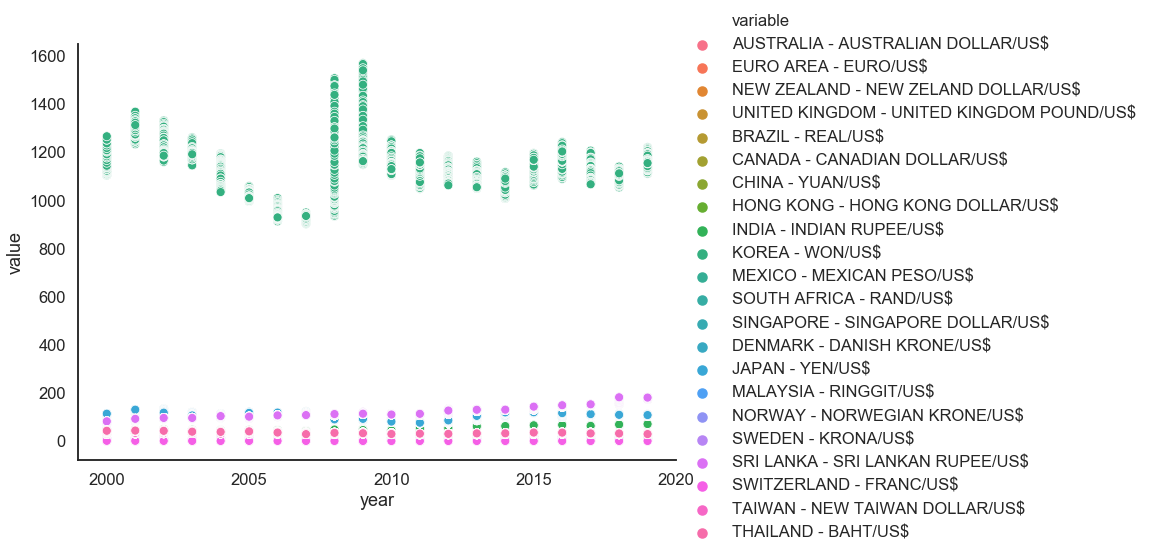

In [22]:
sns.set(style = "white")
sns.set_context("talk")
sns.relplot(x = "year", y = "value",
            hue = "variable",
            data = rates_melt,
            height = 7, aspect = 1.5).set(xlim = (1999, 2020),
                                          xticks = [2000,2005,2010,2015,2020]);

'''
Так как курс корейских вон намного больше остальных валют относительно доллара, то
попробуем для наглядности пока опустить воны.

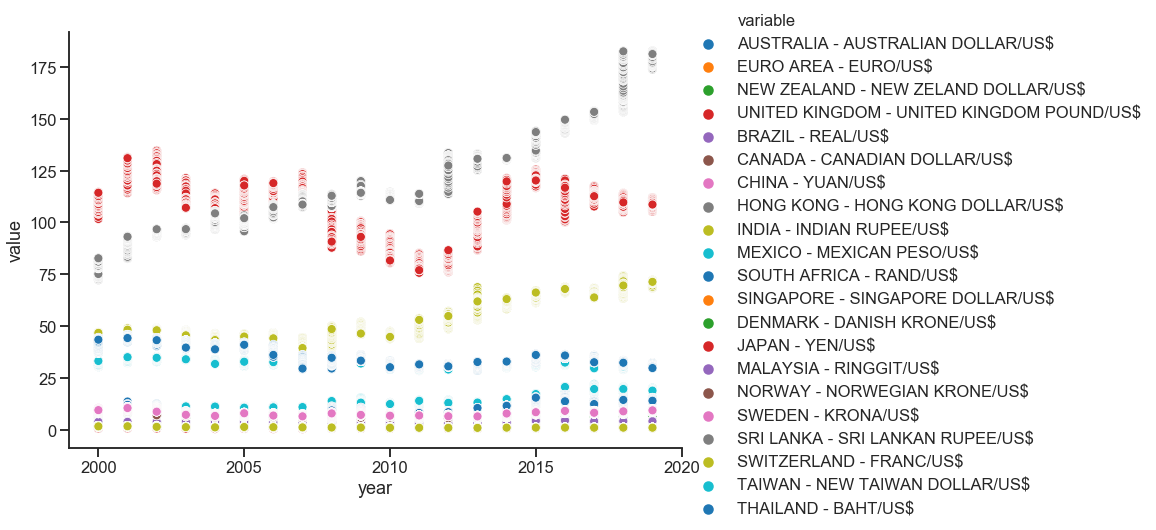

In [23]:
areas = []
time = []
for col in rates.columns.tolist():
    if rates[col].dtype == float and col != "KOREA - WON/US$":
        areas.append(col)
    else:
        time.append(col)

rates_melt = pd.melt(rates, id_vars = time, value_vars = areas)

sns.set(style = "ticks")
sns.set_context("talk")

g = sns.relplot(x = "year", y = "value",
            hue = "variable",
            data = rates_melt, palette="tab10",
            height = 7, aspect = 1.5)

g.set(xlim = (1999, 2020),
      xticks = [2000,2005,2010,2015,2020]);


'''
Все данные вместе все еще сложно сравнивать, поэтому я бы поделил весь dataframe по признаку value на три группы:
1) 0-25 - rates_low
2) 25-200 - rates_mid
3) >200 - rates_high (только Корейский вон)

In [24]:
areas_high = []
areas_mid = []
areas_low = []
time = []

for col in rates.columns.tolist():
    if rates[col].dtype == float and rates[col].min() > 200:
        areas_high.append(col)
    elif rates[col].dtype == float and rates[col].min() > 25:
        areas_mid.append(col)
    elif rates[col].dtype == float and rates[col].min() > 0:
        areas_low.append(col)
    else:
        time.append(col)

rates_high = pd.melt(rates, id_vars = time, value_vars = areas_high)
rates_mid = pd.melt(rates, id_vars = time, value_vars = areas_mid)
rates_low = pd.melt(rates, id_vars = time, value_vars = areas_low)


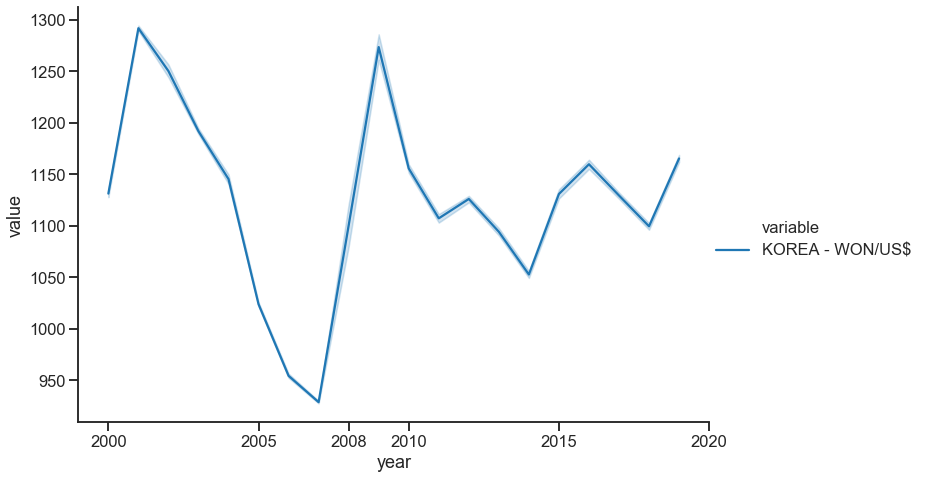

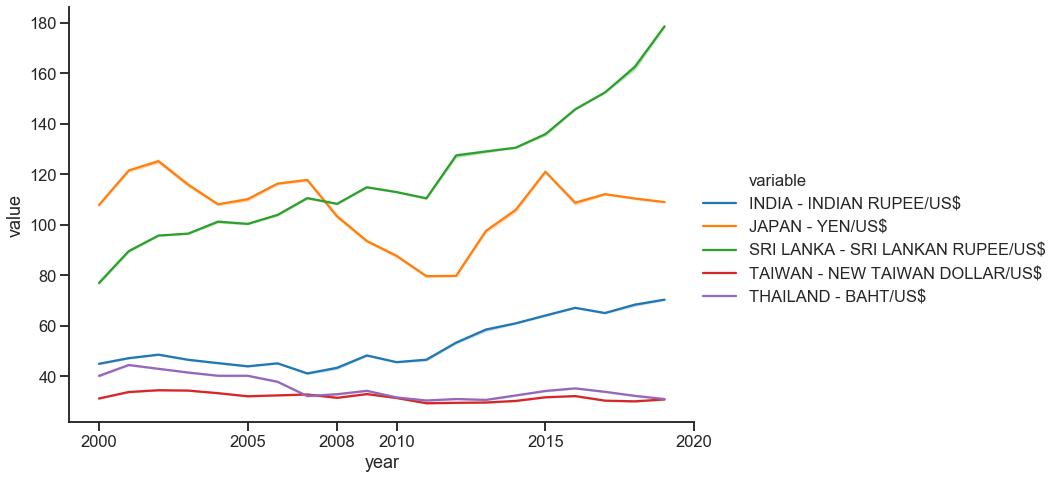

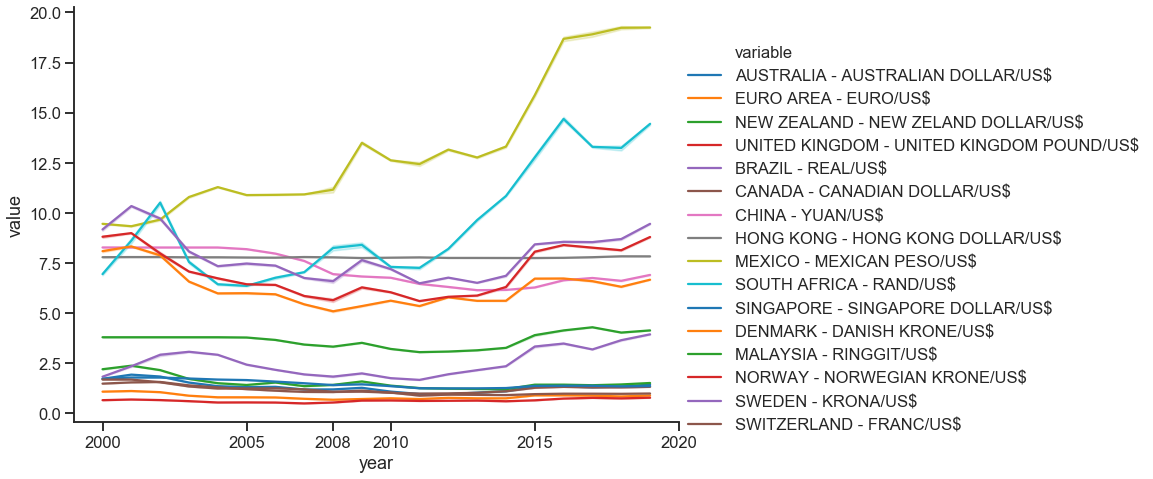

In [29]:
sns.set(style = "ticks")
sns.set_context("talk")

sns.relplot(x = "year", y = "value",
            hue = "variable", kind = "line",
            data = rates_high, palette="tab10",
            height = 7, aspect = 1.5).set(xlim = (1999, 2020), xticks = [2000,2005,2008,2010,2015,2020]);

sns.relplot(x = "year", y = "value",
            hue = "variable",kind = "line",
            data = rates_mid, palette="tab10",
            height = 7, aspect = 1.5).set(xlim = (1999, 2020), xticks = [2000,2005,2008,2010,2015,2020]);

sns.relplot(x = "year", y = "value",
            hue = "variable",kind = "line",
            data = rates_low, palette="tab10",
            height = 7, aspect = 1.5).set(xlim = (1999, 2020), xticks = [2000,2005,2008,2010,2015,2020]);


In [ ]:
rates_corr = []
for col in rates.columns.to_list():
    if rates[col].dtype == float:
        rates_corr.append(col)

rates_corr = pd.DataFrame(rates, columns = rates_corr)
sns.set(style = "white")
sns.set_context("paper")
sns.heatmap(rates_corr.corr(), cmap = plt.cm.get_cmap('coolwarm', 20));

'''
1. В первой группе - корейский вон. Его курс достаточно высок, поэтому на одном графике с другими парами было бы сложно
   сравнивать. Что очень сильно заметно, и я специально отметил, - это кризис 2008 года. Очень заметно, как
   кризис ударил по корейской экономике, что вон вырос с 900 до 1500, почти в два раза. Затем вплоть до 2019-ого
   значения скорректировались до 1200 с резким падением в 2009. Лично для меня, это признак оперативных мер
   корейской экономики по ликвидации последствий кризиса, что и привело к укреплению валюты. То есть, Корея очень
   быстро и грамотно справилась с кризисом 2008.
2. Вторая группа слабее подверглась кризису. Тут мне интереснее поведение валют Индии и Шри-Ланки, которые стабильно
   растут от начала до конца временного промежутка. Я объясняю это инфляцией.
   А вот Япония, судя по всему, к кризису была готова, потому как за промежуток от 2007-го до 2011-го йена вовсе
   укрепилась.
   Тайланд и Тайвань, в целом, стабильны на всем промежутке. Кризис немного повлиял на курс, но общей картины это не
   изменило.
3. В третьей группе выделю Мексику и Южную Африку, которых сильно затронул кризис. Более того, Мексика еще
   и сильно подверглась инфляции. Подозреваю, что Мексика сильно почувстовала кризис из-за не самой сильной
   экономической модели и близости к США. Скандинавские страны Швеция, Норвегия и Дания, как и Бразилия, показали схожую динамику ослабления валюты к 2020-году.    
   Остальные страны - сильные азиатские (Китай, Гонконг, Сингапур, Малайзия) вовсе укрепились, а европейские (Швейцария,
   Великобритания, ЕС), а также Австралия, Новая Зеландия и Канада показали стабильность на всем протяжении промежутка.
 
   Я, лично, объясняю это себе тем, что все эти страны предприняли хорошие и своевременные меры по ликвидации
   последствий кризиса аналогично и одновременно с США. То есть и, к примеру, евро и доллар в тот момент подверглись
   кризису по отдельности, но так как они подверглись ему в одинаковой степени, то и по отношению друг к другу котировка
   не изменилась.

   Для наглядности, привел еще и тепловую карту корреляций всех пар валют. По ней видно, что Шри-Ланка, Южная Африка,
   Мексика и Индия имеют отрицательную корреляцию с остальными парами, что выдает в них слабейшие экономики. Именно
   эти страны больше всего были подвержены инфляции за отчетный период.

'''
Теперь хотелось бы посмотреть есть ли тенденции в росте или падении относительно месяцев и дней недели.

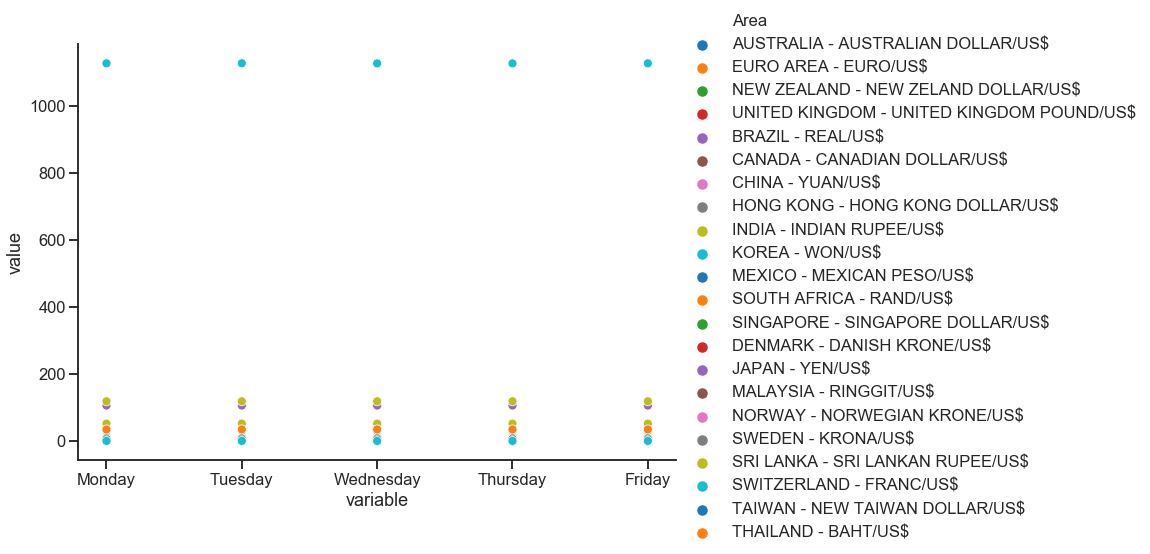

In [30]:
rates_mean = pd.DataFrame()
rates_mean["Monday"]=rates[rates["weekday"]=="Monday"].mean()
rates_mean["Tuesday"]=rates[rates["weekday"]=="Tuesday"].mean()
rates_mean["Wednesday"]=rates[rates["weekday"]=="Wednesday"].mean()
rates_mean["Thursday"]=rates[rates["weekday"]=="Thursday"].mean()
rates_mean["Friday"]=rates[rates["weekday"]=="Friday"].mean()
rates_mean["Area"] = rates_mean.index
rates_mean = rates_mean[:-2]


rates_mean = pd.melt(rates_mean, id_vars = ['Area'], value_vars = ["Monday","Tuesday","Wednesday","Thursday","Friday"])


sns.relplot(x="variable", y="value", hue = "Area", data=rates_mean,
            palette="tab10",
            height = 7, aspect = 1.5);


'''
Не будем разбивать на группы, как мы делали это ранее, так как заметно, что разницы в курсе в зависимости от дня недели нет.


Гораздо интереснее ситуация с месяцами. 

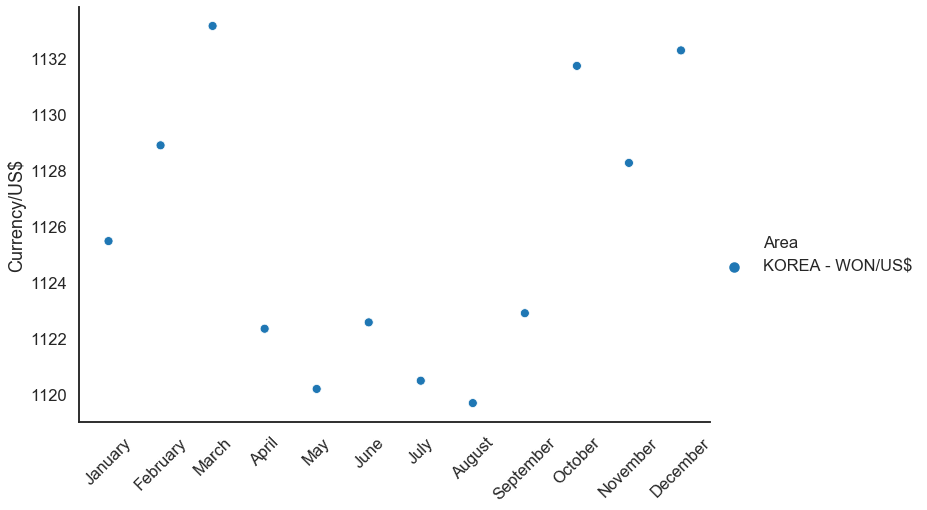

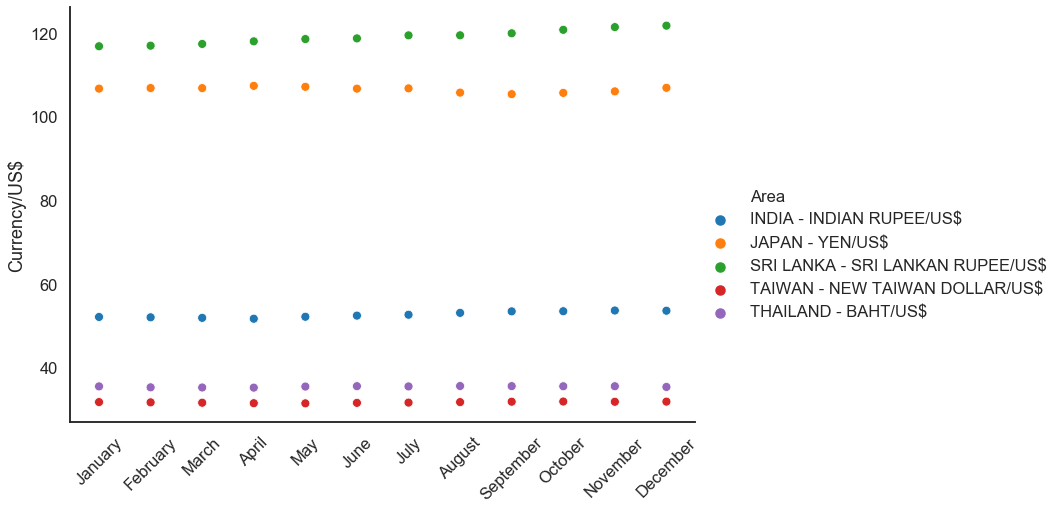

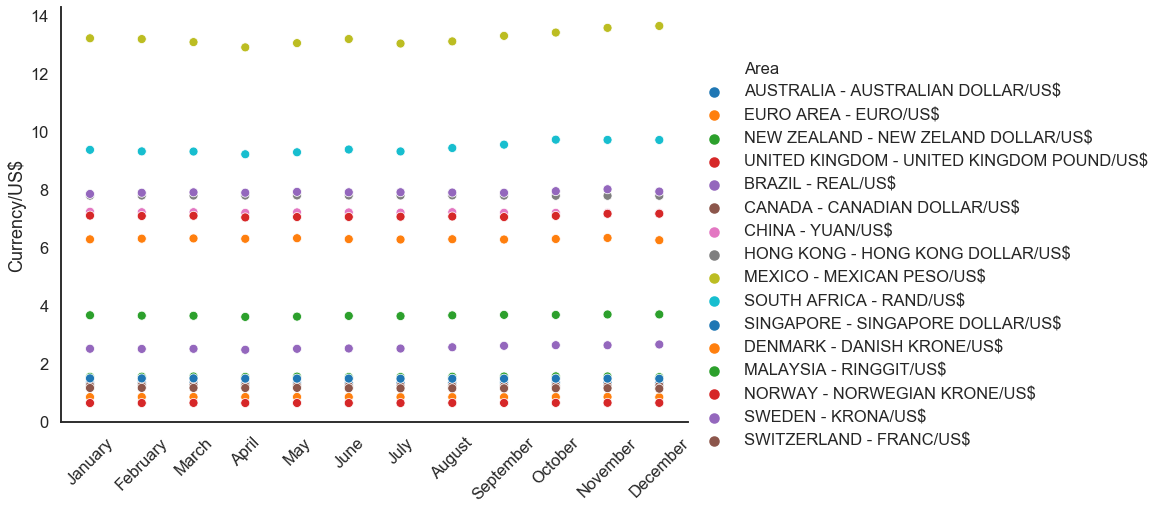

In [78]:
areas_high = []
areas_mid = []
areas_low = []
time = []

for col in rates.columns.tolist():
    if rates[col].dtype == float and rates[col].min() > 200:
        areas_high.append(col)
    elif rates[col].dtype == float and rates[col].min() > 25:
        areas_mid.append(col)
    elif rates[col].dtype == float and rates[col].min() > 0:
        areas_low.append(col)
    else:
        time.append(col)

areas_high.append("month")
areas_mid.append("month")
areas_low.append("month")


rates_h = pd.DataFrame(rates, columns = areas_high)
rates_m = pd.DataFrame(rates, columns = areas_mid)
rates_l = pd.DataFrame(rates, columns = areas_low)


r_h = pd.DataFrame()
r_m = pd.DataFrame()
r_l = pd.DataFrame()

dframes = [r_h,r_m,r_l]

for df1,df2 in zip([r_h,r_m,r_l],[rates_h,rates_m,rates_l]):
    for mon in rates["month"].unique().tolist():
        df1[mon]=df2[df2["month"]==mon].mean()
        

r_h["Area"] = r_h.index
r_m["Area"] = r_m.index
r_l["Area"] = r_l.index

r_h = pd.melt(r_h, id_vars = ['Area'], value_vars = rates["month"].unique().tolist())
r_m = pd.melt(r_m, id_vars = ['Area'], value_vars = rates["month"].unique().tolist())
r_l = pd.melt(r_l, id_vars = ['Area'], value_vars = rates["month"].unique().tolist())


for df in [r_h,r_m,r_l]:    
    sns.set(style = "white")
    sns.set_context("talk")
    sns.relplot(x="variable", y="value", hue = "Area", data=df,
            palette="tab10",
            height = 7, aspect = 1.5).set_xticklabels(rotation=45).set(xlabel = "",ylabel ="Currency/US$")




'''
На примере корейского вона заметно, что колебания в течение года 1126-1120 = 6, 6/1126 х 100% ~ 0.5%.
По поводу роста и падений в определенные промежутки времени, могу сказать, что на фондовом рынке существуют периоды отчетности.
По примеру США, где их 4 (январь, апрель, июль и октябрь) можно четко заметить эту тенденцию на корейской воне.
При том, заметно, что в январе и октябре отчетности зачастую становились триггерами роста экономики,
а в апреле и июле - наоборот.


На остальных графиках, ввиду того, что представлены несколько пар валют, колебания не очень заметны.
Но видно, что валюты все тех же стран, имеющих отрицательную корреляцию, также сильнее подвержены и колебаниям.
Для того, чтобы четче рассмотреть, какие валюты сильнее колеблются в зависимости от месяца, построим соответствующий график.
Моя идея выставить в виде значения по y-axis отношение стандартного отклонения к среднему значению в процентах.


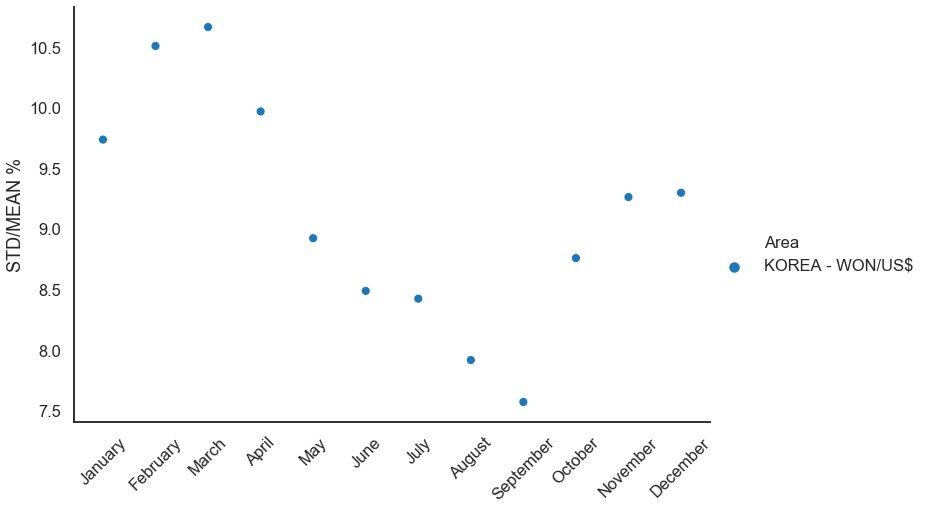

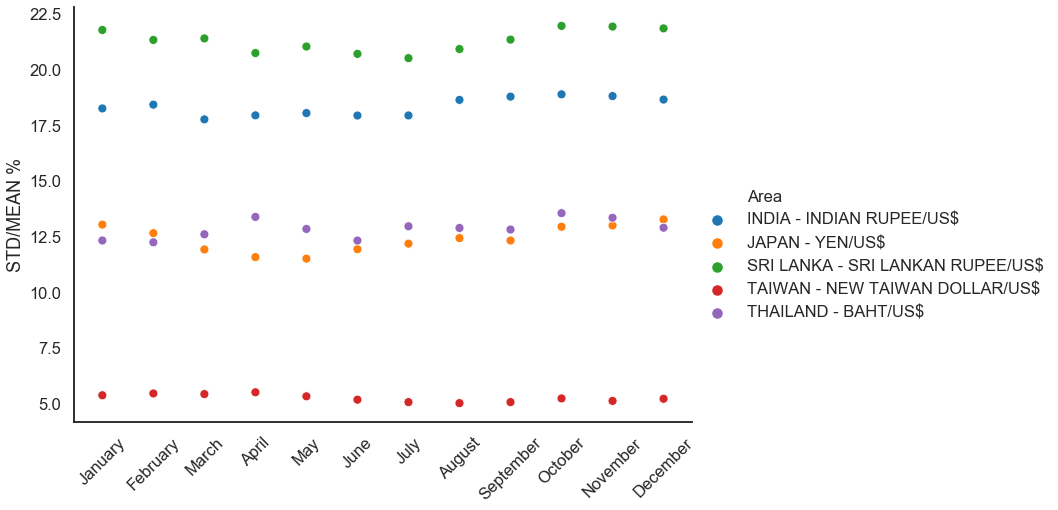

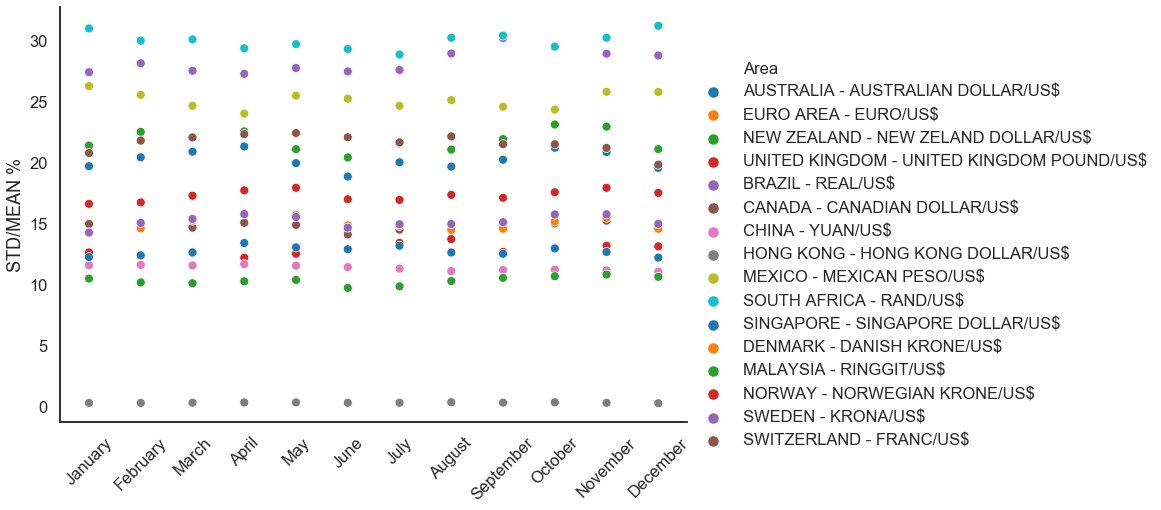

In [32]:
areas_high = []
areas_mid = []
areas_low = []
time = []

for col in rates.columns.tolist():
    if rates[col].dtype == float and rates[col].min() > 200:
        areas_high.append(col)
    elif rates[col].dtype == float and rates[col].min() > 25:
        areas_mid.append(col)
    elif rates[col].dtype == float and rates[col].min() > 0:
        areas_low.append(col)
    else:
        time.append(col)

areas_high.append("month")
areas_mid.append("month")
areas_low.append("month")


rates_h = pd.DataFrame(rates, columns = areas_high)
rates_m = pd.DataFrame(rates, columns = areas_mid)
rates_l = pd.DataFrame(rates, columns = areas_low)

r_h = pd.DataFrame()
r_m = pd.DataFrame()
r_l = pd.DataFrame()

dframes = [r_h,r_m,r_l]

for df1,df2 in zip([r_h,r_m,r_l],[rates_h,rates_m,rates_l]):
    for mon in rates["month"].unique().tolist():
        df1[mon]=(df2[df2["month"]==mon].std()/df2[df2["month"]==mon].mean()) * 100



r_h["Area"] = r_h.index
r_m["Area"] = r_m.index
r_l["Area"] = r_l.index

r_h = pd.melt(r_h, id_vars = ['Area'], value_vars = rates["month"].unique().tolist())
r_m = pd.melt(r_m, id_vars = ['Area'], value_vars = rates["month"].unique().tolist())
r_l = pd.melt(r_l, id_vars = ['Area'], value_vars = rates["month"].unique().tolist())


for df in [r_h,r_m,r_l]:    
    sns.set(style = "white")
    sns.set_context("talk")
    sns.relplot(x="variable", y="value", hue = "Area", data=df,
            palette="tab10",
            height = 7, aspect = 1.5).set_xticklabels(rotation=45).set(xlabel = "",ylabel ="STD/MEAN %")

'''
Мы можем заметить все те же закономерности. Слабые экономики имеют сильные колебания.
Что интересно, мы можем заметить региональную специфику курсов. То есть азиатские страны имеют очень маленькие колебания,
которые не сильно меняются от месяца к месяцу, тогда как европейские страны, а также Канада и Австралия имеют чуть большие
значения колебаний, которые сильнее меняются от месяца к месяцу.
Я объясняю это тем, что в европейских странах лучше построена рыночная экономика и курс, колеблясь, показывает реакцию рынка
на те или иные события. С другой стороны, азиатские страны, имея более жесткое государственное устройство, сильнее контролируют
рынок вероятными валютными интервенициями для поддержания стабильности (рассуждаю на примере Казахстана).
Как итог, значения колебаний выше 25 считаю показателями слабых экономик, от 25 до 15 - достаточно сильных европейских (плюс Канада и старны Океании) экономик, а ниже 15 - сильных азиатских экономик.

Нагляднее на взаимосвязь между средним и отклонением можно увидеть на boxplot.
Но для этого вторую и третью группу стоит разделить еще на несколько.

М1: Япония, Шри-Ланка
М2: Индия, Тайвань, Тайланд
Скандинавские: Швеция, Норвегия, Дания
Азиатские: Малайзия, Гонконг, Китай, Сингапур
Европиоидные: Австралия, ЕС, Новая Зеландия, Великобритания, Канада, Швейцария
Остальные: Мексика, ЮАР, Бразилия

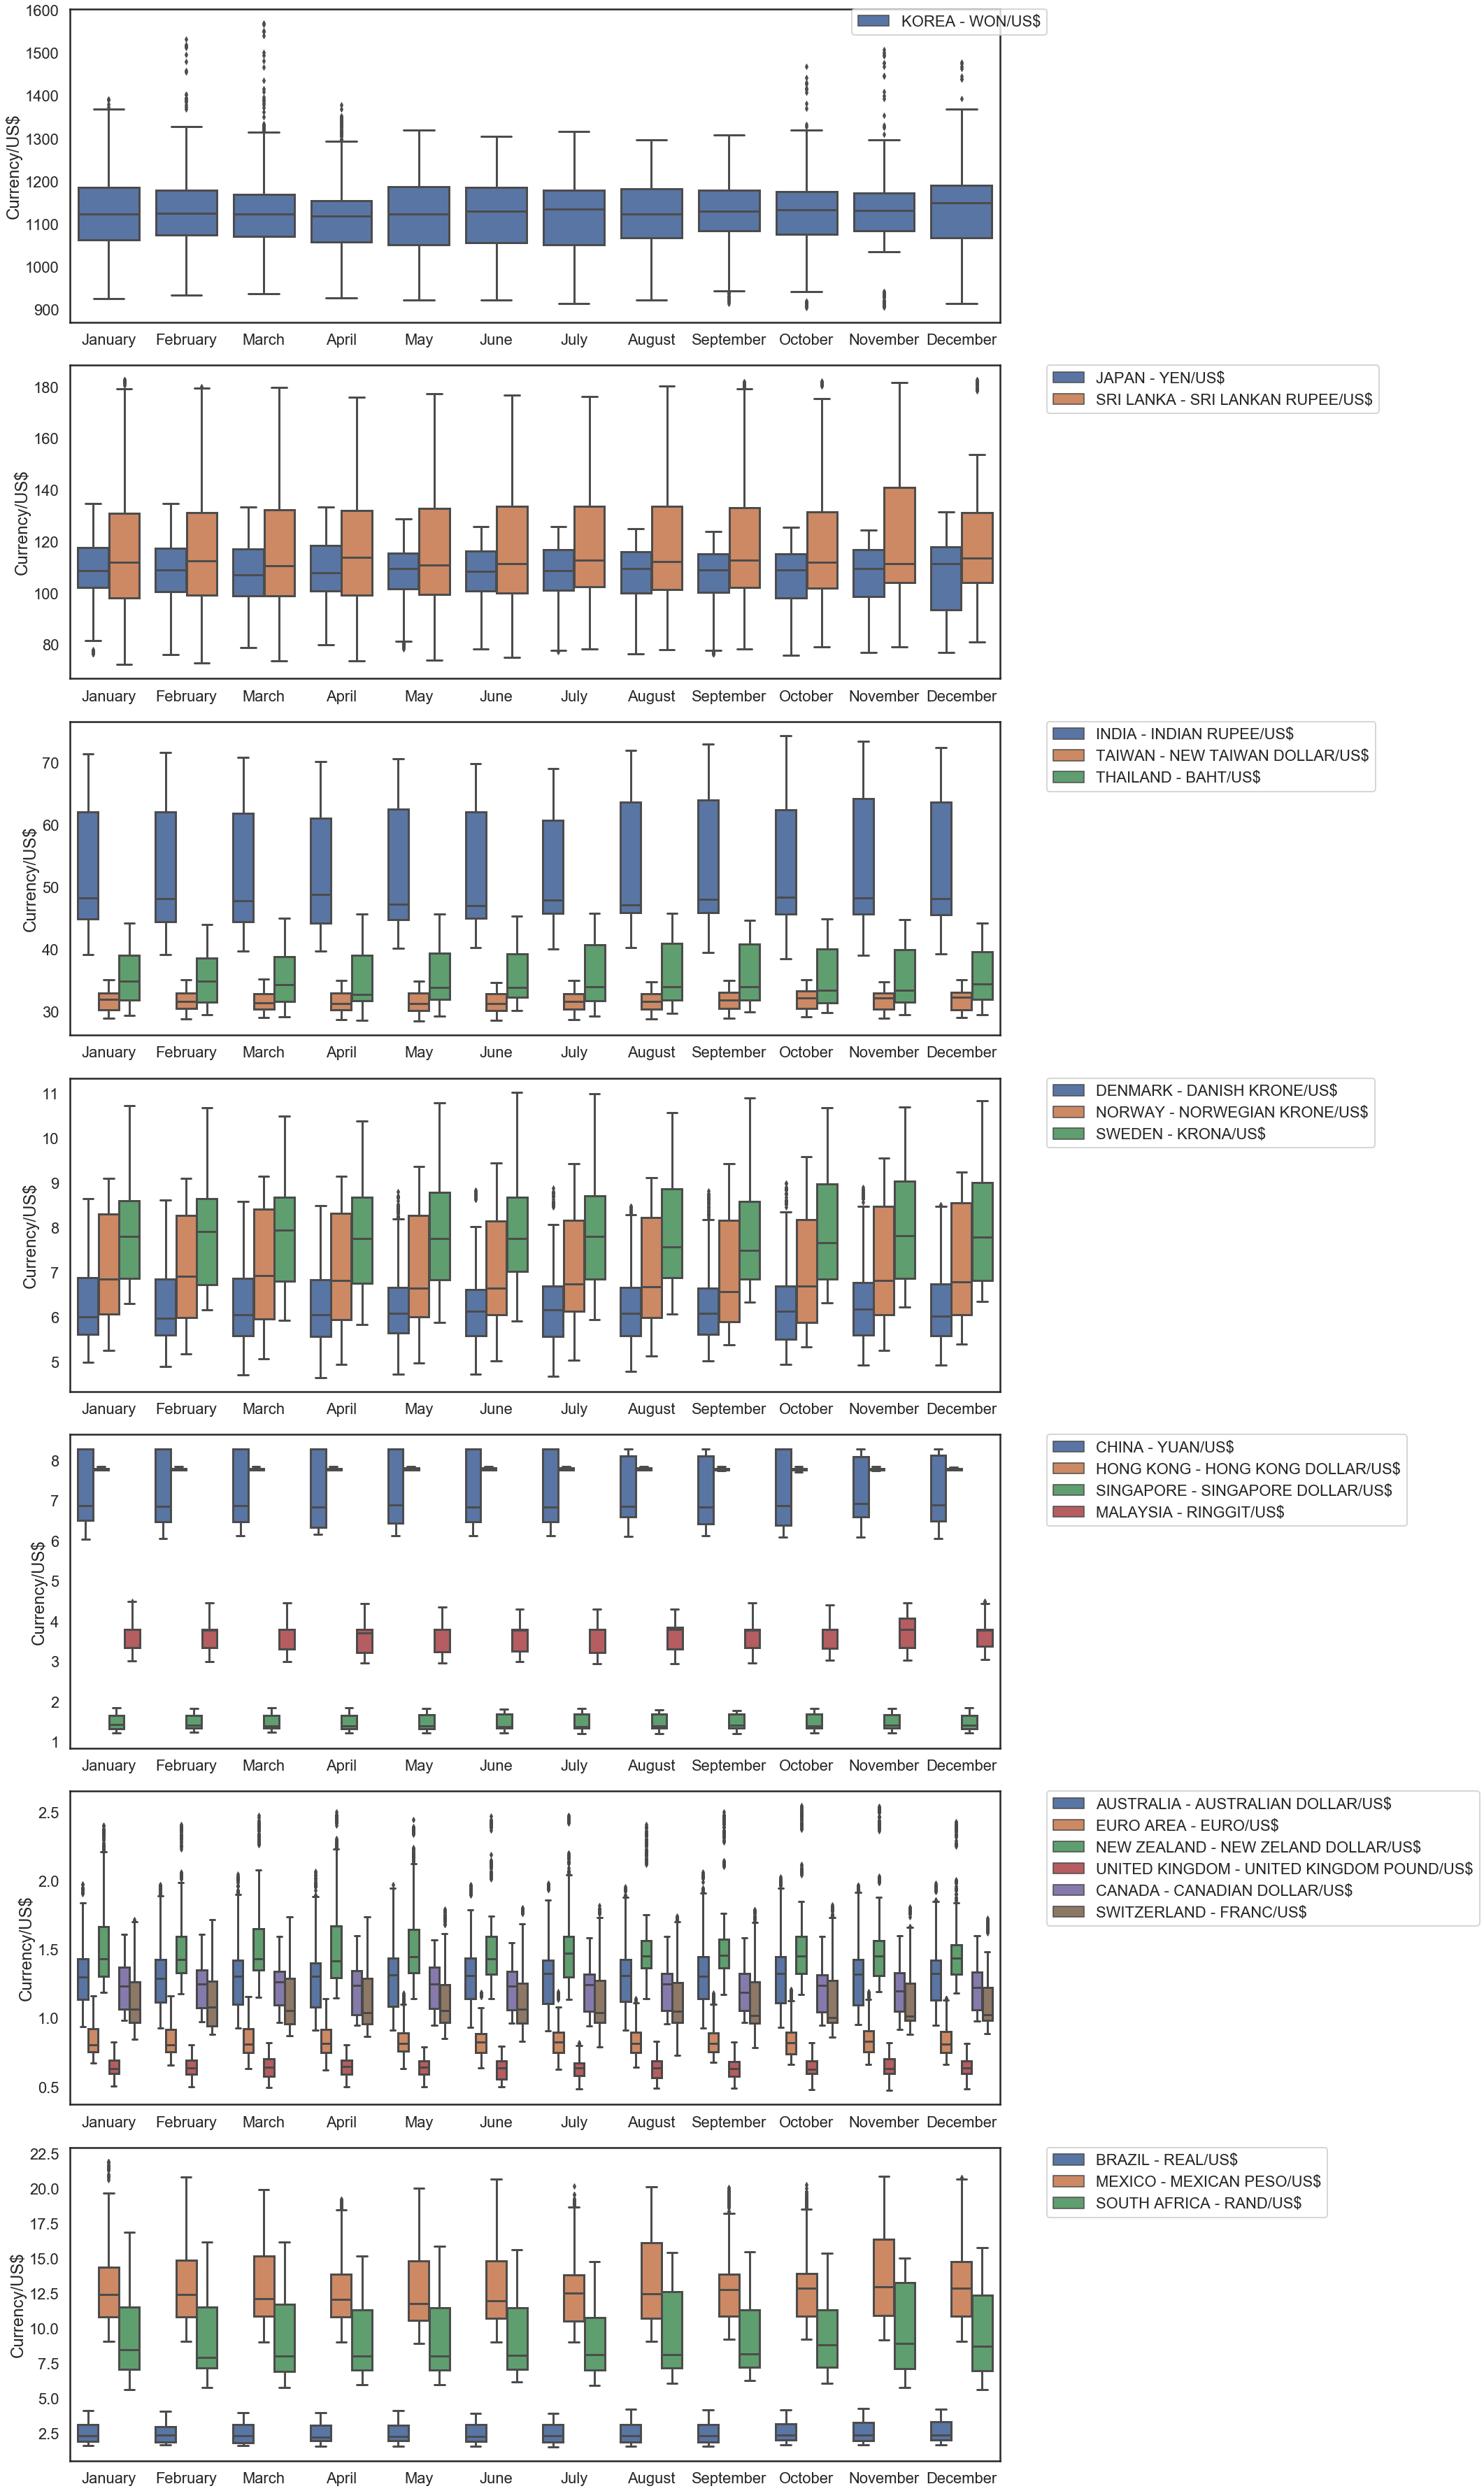

In [91]:
areas_high = []
areas_mid_1 = []
areas_mid_2 = []
areas_low_sk = []
areas_low_as = []
areas_low_eu = []
areas_low_ot = []
time = []

for col in rates.columns.tolist():
    if rates[col].dtype == float and rates[col].min() > 200:
        areas_high.append(col)
    elif col == "JAPAN - YEN/US$" or col == "SRI LANKA - SRI LANKAN RUPEE/US$":
        areas_mid_1.append(col)
    elif col == "TAIWAN - NEW TAIWAN DOLLAR/US$" or col == "INDIA - INDIAN RUPEE/US$" or col == "THAILAND - BAHT/US$":
        areas_mid_2.append(col)
    elif col == "SWEDEN - KRONA/US$" or col == "NORWAY - NORWEGIAN KRONE/US$" or col == "DENMARK - DANISH KRONE/US$":
        areas_low_sk.append(col)
    elif col == "MALAYSIA - RINGGIT/US$" or col == "HONG KONG - HONG KONG DOLLAR/US$" or col == "CHINA - YUAN/US$" or col == "SINGAPORE - SINGAPORE DOLLAR/US$":
        areas_low_as.append(col)
    elif col == "AUSTRALIA - AUSTRALIAN DOLLAR/US$" or col == "EURO AREA - EURO/US$" or col == "NEW ZEALAND - NEW ZELAND DOLLAR/US$" or col == "UNITED KINGDOM - UNITED KINGDOM POUND/US$" or col == "CANADA - CANADIAN DOLLAR/US$" or col == "SWITZERLAND - FRANC/US$":
        areas_low_eu.append(col)
    elif col == "MEXICO - MEXICAN PESO/US$" or col == "SOUTH AFRICA - RAND/US$" or col == "BRAZIL - REAL/US$":
        areas_low_ot.append(col)
    else:
        time.append(col)


rates_h = pd.DataFrame(rates, columns = areas_high)
rates_h["month"] = rates["month"]
rates_m_1 = pd.DataFrame(rates, columns = areas_mid_1)
rates_m_1["month"] = rates["month"]
rates_m_2 = pd.DataFrame(rates, columns = areas_mid_2)
rates_m_2["month"] = rates["month"]
rates_l_sk = pd.DataFrame(rates, columns = areas_low_sk)
rates_l_sk["month"] = rates["month"]
rates_l_as = pd.DataFrame(rates, columns = areas_low_as)
rates_l_as["month"] = rates["month"]
rates_l_eu = pd.DataFrame(rates, columns = areas_low_eu)
rates_l_eu["month"] = rates["month"]
rates_l_ot = pd.DataFrame(rates, columns = areas_low_ot)
rates_l_ot["month"] = rates["month"]



rates_h = pd.melt(rates_h, id_vars = ['month'], value_vars = areas_high)
rates_m_1 = pd.melt(rates_m_1, id_vars = ['month'], value_vars = areas_mid_1)
rates_m_2 = pd.melt(rates_m_2, id_vars = ['month'], value_vars = areas_mid_2)
rates_l_sk = pd.melt(rates_l_sk, id_vars = ['month'], value_vars = areas_low_sk)
rates_l_as = pd.melt(rates_l_as, id_vars = ['month'], value_vars = areas_low_as)
rates_l_eu = pd.melt(rates_l_eu, id_vars = ['month'], value_vars = areas_low_eu)
rates_l_ot = pd.melt(rates_l_ot, id_vars = ['month'], value_vars = areas_low_ot)



fig = plt.figure(figsize = (30,50))

sns.set(style = "white")
sns.set_context("poster")

ax1 = fig.add_subplot(7,1,1)
sns.boxplot(x = "month", y = "value", hue = "variable", data = rates_h).set(xlabel = "",ylabel ="Currency/US$")
plt.legend(bbox_to_anchor=(1.05, 1), loc="best", borderaxespad=0.)
plt.tight_layout();

ax2 = fig.add_subplot(7,1,2)
sns.boxplot(x = "month", y = "value", hue = "variable", data = rates_m_1).set(xlabel = "",ylabel ="Currency/US$")
plt.legend(bbox_to_anchor=(1.05, 1), loc="best", borderaxespad=0.)
plt.tight_layout();

ax3 = fig.add_subplot(7,1,3)
sns.boxplot(x = "month", y = "value", hue = "variable", data = rates_m_2).set(xlabel = "",ylabel ="Currency/US$")
plt.legend(bbox_to_anchor=(1.05, 1), loc="best", borderaxespad=0.)
plt.tight_layout();

ax4 = fig.add_subplot(7,1,4)
sns.boxplot(x = "month", y = "value", hue = "variable", data = rates_l_sk).set(xlabel = "",ylabel ="Currency/US$")
plt.legend(bbox_to_anchor=(1.05, 1), loc="best", borderaxespad=0.)
plt.tight_layout();

ax5 = fig.add_subplot(7,1,5)
sns.boxplot(x = "month", y = "value", hue = "variable", data = rates_l_as).set(xlabel = "",ylabel ="Currency/US$")
plt.legend(bbox_to_anchor=(1.05, 1), loc="best", borderaxespad=0.)
plt.tight_layout();

ax6 = fig.add_subplot(7,1,6)
sns.boxplot(x = "month", y = "value", hue = "variable", data = rates_l_eu).set(xlabel = "",ylabel ="Currency/US$")
plt.legend(bbox_to_anchor=(1.05, 1), loc="best", borderaxespad=0.)
plt.tight_layout();

ax7 = fig.add_subplot(7,1,7)
sns.boxplot(x = "month", y = "value", hue = "variable", data = rates_l_ot).set(xlabel = "",ylabel ="Currency/US$")
plt.legend(bbox_to_anchor=(1.05, 1), loc="best", borderaxespad=0.)
plt.tight_layout();

'''
Boxplots получилось 7. Показателем хорошей экономики я считаю наличие симметричных шпилек c медианой посередине и отсутствием outliers.
1 график. Как мы уже описывали ранее, колебания в зависимости от месяцев. В ноябре аномально короткий нижний шпиль и большое количество outliers.
2 график. Сильная Япония и слабая Шри-Ланка. У Японии все боксы практически одинаковы по фигуре и значениям, у Шри-Ланки слишком большой разброс значений, которые прослеживаются в длинных шпилях, особенно сверху. Медиана у Шри-Ланки ниже середины бокса.
3 график. Довольно стабильный Тайвань и более слабые Индия и Тайланд. У последних двух длинные тела и медианы ниже середины.
4 график. Похожие Дания и Швеция с длинными верхними шпилями. У Дании заметны outliers. Норвегия более стабильная, однако с боксом длиннее относительно шпилей. По моему мнению, Норвегия имеет более сильную валюту относительно Швеции и Дании.
5 график. Очень странный Гонконг, который практически не колеблется и за все время не подвергся изменениям котировок относительно доллара. Судя по всему, экономика этой страны очень жестко контролируется государством. Китай имеет длинное тело, но короткие (или вовсе не имеет) шпилей, что говорит о довольно стабильной валюте. Однако, стоит заметить медиану, которая находится в нижней части тела. То есть валюта часто поднималась на бОльшие пункты, чем опускалась относительно медианы.
У Малайзии и Сингапура довольно сильные валюты с короткими пропорционально короткими телами и шпилями. Однако, у Малайзии медиана совпадает с верхним квартилем, а у Сингапура с нижним. У первой валюта росла относительно доллара редко, чаще падала, а у второй наоборот.
6 график. Отличные боксы у Великобритании и Канады. Остальные ассимметричны и имеют outliers.
7 график. Слабейшая - Мексика с outliers. ЮАР от месяца к месяцу меняется сильно, но сохраняет стабильность фигуры с коротким нижним шпилем и длинным верхним. Лучшая - Бразилия с коротким телом и пропорционально короткими шпилями. Однако, заметно, как сильно меняется медиана от месяца к месяцу.